In [3]:
import pandas as pd

titanic_df = pd.read_csv("titanic1.csv")

titanic_df.tail()


FileNotFoundError: [Errno 2] No such file or directory: 'titanic1.csv'

In [1]:
# tem campos vazios?
titanic_df.isna().sum()

NameError: name 'titanic_df' is not defined

In [3]:
import numpy as np

mean_age = np.mean(titanic_df['Age'])
titanic_df.fillna({'Age': mean_age}, inplace=True)


In [4]:
import  numpy as np

#X = titanic_df.drop(['Survived'], axis=1)
features = ['PassengerId', 'Sex', 'Fare', 'Pclass',
                'SibSp', 'Parch',
                'Embarked', 'Age']


X = titanic_df[features]

Y = titanic_df['Survived']

X.head(10)

,PassengerId,Sex,Fare,Pclass,SibSp,Parch,Embarked,Age
0,1,male,7.2500,3,1,0,S,22.000000
1,1,male,7.2500,3,1,0,S,22.000000
2,1,male,7.2500,3,1,0,S,22.000000
3,1,male,7.2500,3,1,0,S,22.000000
4,1,male,7.2500,3,1,0,S,22.000000
5,2,female,71.2833,1,1,0,C,380.000000
6,3,female,7.9250,3,0,0,S,26.000000
7,4,female,53.1000,1,1,0,S,35.000000
8,5,male,8.0500,3,0,0,S,35.000000
9,6,male,8.4583,3,0,0,Q,30.132549


In [ ]:
titanic_df.isna().sum()

In [5]:
import numpy as np

mean_age = np.mean(X['Age'])

mean_age

30.132548746518104

In [6]:
X.fillna({'Age': mean_age}, inplace=True)

<ipython-input-6-aa0d406a69a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna({'Age': mean_age}, inplace=True)


In [7]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=1)

model.fit(X, Y)

ValueError: could not convert string to float: 'male'

In [8]:
X = pd.get_dummies(X)

X

,PassengerId,Fare,Pclass,SibSp,Parch,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,7.25,3,1,0,22.000000,False,True,False,False,True
1,1,7.25,3,1,0,22.000000,False,True,False,False,True
2,1,7.25,3,1,0,22.000000,False,True,False,False,True
3,1,7.25,3,1,0,22.000000,False,True,False,False,True
4,1,7.25,3,1,0,22.000000,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
890,887,13.00,2,0,0,27.000000,False,True,False,False,True
891,888,30.00,1,0,0,19.000000,True,False,False,False,True
892,889,23.45,3,1,2,30.132549,True,False,False,False,True
893,890,30.00,1,0,0,26.000000,False,True,True,False,False


In [19]:
tree_model = tree.DecisionTreeClassifier(max_depth=20)
tree_model.fit(X, Y)

tree_model.score(X,Y)

1.0

In [10]:
tree_model.get_depth()

1

In [ ]:
# importancia: função do número de caminhos + redução de impureza
for name, importance in zip(X.columns,
                            tree_model.feature_importances_):
    print(name, importance)

[Text(0.4868457683741648, 0.9545454545454546, 'Sex_female <= 0.5\ngini = 0.472\nsamples = 895\nvalue = [553, 342]'),
 Text(0.18158407572383073, 0.8636363636363636, 'Age <= 6.5\ngini = 0.305\nsamples = 581\nvalue = [472, 109]'),
 Text(0.3342149220489978, 0.9090909090909092, 'True  '),
 Text(0.031180400890868598, 0.7727272727272727, 'SibSp <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.022271714922048998, 0.6818181818181818, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.0400890868596882, 0.6818181818181818, 'Age <= 2.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.031180400890868598, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.04899777282850779, 0.5909090909090909, 'Fare <= 31.331\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.0400890868596882, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05790645879732739, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.33198775055679286, 0.7727272727272727, 'Pclass 

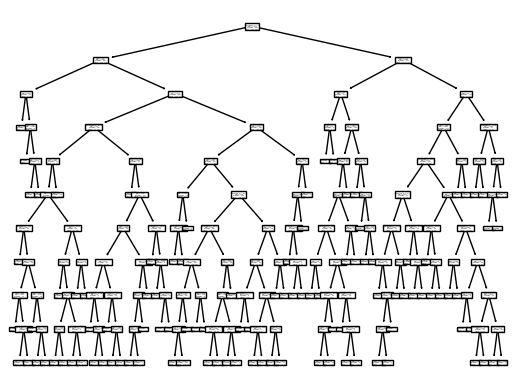

In [18]:
tree.plot_tree(tree_model, feature_names=X.columns.to_list())

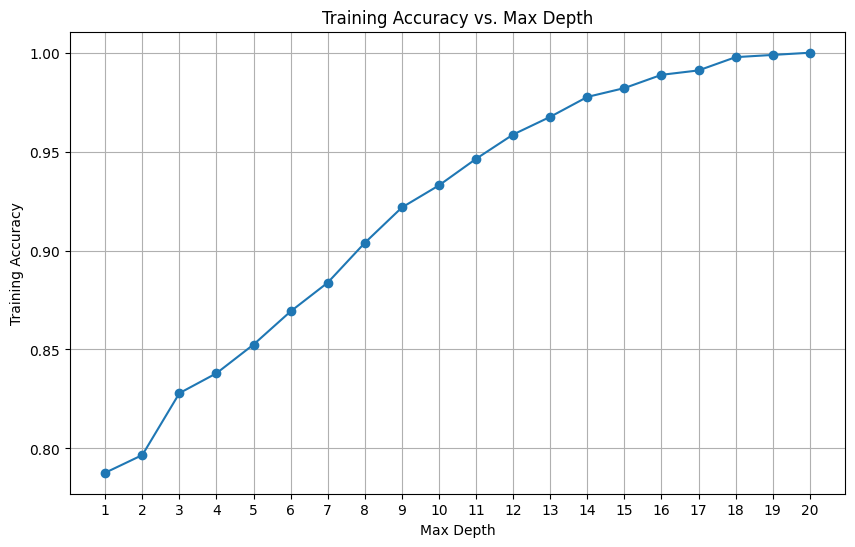

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


max_depths = range(1, 21)
training_accuracies = []

# Train Decision Trees with different max depths and record training accuracy
for depth in max_depths:
    tree_model = DecisionTreeClassifier(max_depth=depth)
    tree_model.fit(X, Y)
    accuracy = tree_model.score(X,Y)
    training_accuracies.append(accuracy)



# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_accuracies, marker='o', linestyle='-')
plt.title('Training Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Training Accuracy')
plt.grid(True)
plt.xticks(max_depths)
plt.show()

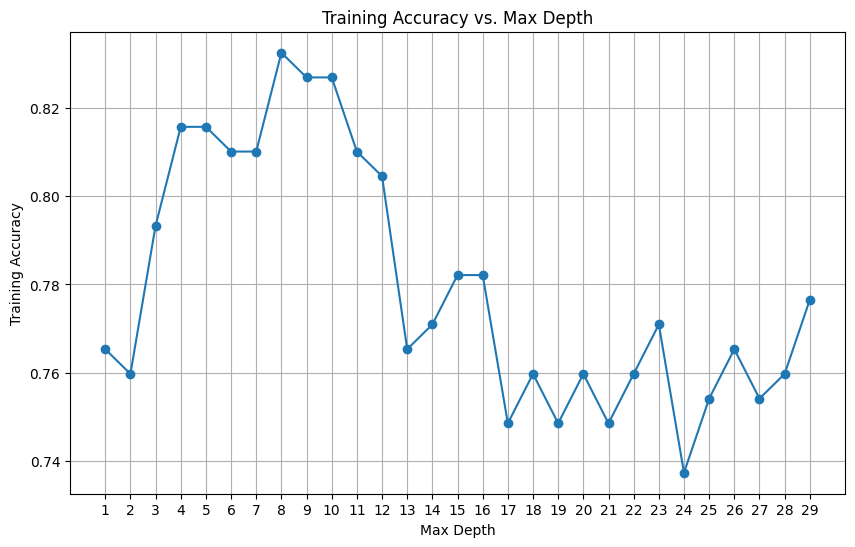

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


max_depths = range(1, 30)
training_accuracies = []

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# Train Decision Trees with different max depths and record training accuracy
for depth in max_depths:
    tree_model = DecisionTreeClassifier(max_depth=depth)

    tree_model.fit(X_train, Y_train)
    accuracy = tree_model.score(X_test,Y_test)
    training_accuracies.append(accuracy)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_accuracies, marker='o', linestyle='-')
plt.title('Training Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Training Accuracy')
plt.grid(True)
plt.xticks(max_depths)
plt.show()

In [ ]:
best_depth = 3

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, Y_train)
accuracy = tree_model.score(X_test,Y_test)

accuracy

In [ ]:
Y_pred = tree_model.predict(X_test)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

plt.show()